#Imports

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import spearmanr

# **Initial Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Code_Dataset/D6.xlsx')
df = pd.DataFrame(df)

In [ ]:
df.shape

(225, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 43 columns):
 #   Column                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                         --------------  -----         
 0   Timestamp                                                                                                      225 non-null    datetime64[ns]
 1   Name (Initial at end)                                                                                          225 non-null    object        
 2   Gender                                                                                                         225 non-null    object        
 3   Studying in ___________                                                                                        225 non-null    object        
 4   Enter Yo

In [ ]:
df.head()

,Timestamp,Name (Initial at end),Gender,Studying in ___________,Enter Your Height:(eg- 169 cm),Enter your Weight:(eg-50kg),Age,Enter the name of subject 1,Enter your marks in subject 1 in total of 100 marks or in Grade,Enter the name of subject 2,...,"At what average frequency, would you go to the hospital in a month?",Are you wearing spectacles?,Choose your daily mobile usage in hours,What is your wakeup time? (Note : Time is in 24 hr format),What is your sleeping time? (Note : Time is in 24 hr format),How many days would you take the sick leave per month?,Are you feeling sleepy during class hours?,Do you experience any of the following types of pain in your day-to-day life?,"On average, how long are you able to read continuously while maintaining a high level of concentration?",Are you engaged in any sports activities?
0,2024-01-24 22:41:13.765,Visvambra.s,Male,Matric,80 to 120,28.800g,13-18,Tamil,96.0,English,...,0,No,Less than 2 hours,07:30:00,11:30:00,1 to 5 days,Yes,None of the above,15 to 30 minutes,Yes
1,2024-01-18 14:19:12.566,Selvabrindha K,Female,Engineering College,150,46,13-18,Tamil,97.0,English,...,2,No,2 to 5 hours,06:00:00,22:30:00,1 to 5 days,Yes,None of the above,30 minutes to 1 hour,No
2,2024-01-18 15:11:24.714,Nidhekshaa N K,Female,Engineering College,152,43,13-18,Computer organisation,75.0,Data science,...,6,No,2 to 5 hours,07:00:00,10:30:00,1 to 5 days,Yes,"Leg pain, Headaches",15 to 30 minutes,Yes
3,2024-01-18 16:59:29.917,KANMANIPRIYA S,Female,Engineering College,155 cm,50 kg,13-18,Tamil,96.0,Discrete mathematical structures,...,0,Yes,2 to 5 hours,06:00:00,23:00:00,None,Yes,Neck pain,30 minutes to 1 hour,No
4,2024-01-05 19:44:21.157,R Ranish,Male,Matric,11,17,6-12,Science,74.0,English,...,0,No,Less than 2 hours,06:00:00,10:00:00,1 to 5 days,Yes,Leg pain,More than 3 hours,Yes


##Removing cm in height field

In [ ]:
df["Enter Your Height:(eg- 169 cm)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 0 to 224
Series name: Enter Your Height:(eg- 169 cm)
Non-Null Count  Dtype 
--------------  ----- 
225 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [ ]:
data = df["Enter Your Height:(eg- 169 cm)"].astype(str)

In [ ]:
import re

In [ ]:
def extract_numeric_height(height):
    match = re.match(r'(\d+)', height)
    if match:
        return int(match.group(1))
    else:
        return None

In [ ]:
numeric_heights = [extract_numeric_height(height) for height in data]

In [ ]:
print(numeric_heights)

[80, 150, 152, 155, 11, 130, 178, 135, 167, 180, 155, 130, 150, 150, 138, 150, 152, 130, 184, 159, 11, 117, 140, 145, 155, 146, 125, 138, 158, 134, 127, 132, 156, 173, 155, 170, 158, 150, 171, 170, 166, 168, 160, 182, 172, 164, 150, 180, 186, 155, 174, 157, 161, 190, 183, 160, 159, 155, 175, 156, 165, 176, 152, 175, 162, 180, 182, 172, 166, 171, 173, 175, 178, 155, 172, 175, 153, 150, 172, 160, 165, 165, 190, 158, 157, 165, 180, 159, 170, 175, 175, 142, 183, 168, 178, 190, 189, 179, 145, 162, 160, 187, 189, 185, 172, 176, 150, 173, 178, 159, 175, 178, 175, 165, 152, 169, 155, 155, 154, 155, 170, 172, 175, 173, 182, 166, 154, 165, 165, 157, 175, 168, 152, 156, 153, 162, 165, 157, 169, 158, 175, 169, 150, 175, 183, 165, 175, 174, 178, 163, 158, 170, 145, 172, 172, 150, 156, 172, 175, 177, 172, 170, 180, 156, 175, 175, 178, 157, 171, 175, 170, 169, 156, 150, 173, 173, 179, 178, 152, 174, 185, 157, 154, 167, 170, 160, 150, 172, 174, 175, 170, 172, 176, 164, 170, 175, 173, 155, 171, 158, 17

In [ ]:
df["heights"] = numeric_heights

In [ ]:
df["heights"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 0 to 224
Series name: heights
Non-Null Count  Dtype
--------------  -----
225 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [ ]:
df[["Enter Your Height:(eg- 169 cm)","heights"]]

,Enter Your Height:(eg- 169 cm),heights
0,80 to 120,80
1,150,150
2,152,152
3,155 cm,155
4,11,11
...,...,...
220,175,175
221,165 cm,165
222,165 cm,165
223,145,145


In [ ]:
df.shape

(225, 44)

In [ ]:
df = df.drop(columns=["Enter Your Height:(eg- 169 cm)"])

In [ ]:
df.shape

(225, 43)

##Removing KG in Weight Field

In [ ]:
df["Enter your Weight:(eg-50kg)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 0 to 224
Series name: Enter your Weight:(eg-50kg)
Non-Null Count  Dtype 
--------------  ----- 
225 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [ ]:
data = df["Enter your Weight:(eg-50kg)"].astype(str)

In [ ]:
def extract_numeric_weight(weight):
    match = re.match(r'(\d+)', weight)
    if match:
        return int(match.group(1))
    else:
        return None

In [ ]:
numeric_weights = [extract_numeric_weight(weight) for weight in data]

In [ ]:
print(numeric_weights)

[28, 46, 43, 50, 17, 38, 75, 45, 60, 55, 45, 35, 35, 63, 25, 40, 48, 28, 40, 60, 18, 18, 50, 51, 50, 40, 32, 38, 37, 24, 24, 25, 42, 60, 45, 51, 44, 45, 65, 54, 58, 54, 48, 65, 60, 71, 60, 80, 100, 50, 70, 51, 72, 48, 76, 52, 55, 51, 69, 55, 40, 72, 57, 75, 54, 58, 55, 57, 50, 75, 65, 60, 65, 42, 67, 70, 44, 56, 90, 60, 55, 54, 80, 55, 55, 42, 60, 68, 65, 74, 88, 52, 75, 58, 70, 60, 86, 82, 57, 53, 50, 67, 87, 87, 85, 65, 49, 56, 82, 86, 56, 61, 70, 59, 52, 72, 45, 49, 50, 55, 45, 79, 89, 49, 49, 64, 50, 44, 60, 58, 55, 55, 43, 55, 43, 40, 61, 50, 54, 49, 56, 50, 60, 62, 64, 52, 86, 60, 70, 78, 43, 65, 65, 50, 50, 46, 44, 62, 70, 83, 80, 58, 80, 40, 69, 58, 70, 50, 58, 75, 95, 62, 53, 59, 64, 50, 65, 70, 75, 60, 80, 67, 54, 64, 63, 69, 53, 80, 64, 56, 59, 70, 72, 64, 54, 75, 60, 55, 52, 66, 65, 64, 50, 65, 60, 70, 46, 74, 82, 51, 72, 60, 41, 50, 50, 55, 50, 42, 50, 80, 63, 65, 55, 40, 46]


In [ ]:
df["weights"] = numeric_weights

In [ ]:
df["weights"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 0 to 224
Series name: weights
Non-Null Count  Dtype
--------------  -----
225 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [ ]:
df[["Enter your Weight:(eg-50kg)","weights"]]

,Enter your Weight:(eg-50kg),weights
0,28.800g,28
1,46,46
2,43,43
3,50 kg,50
4,17,17
...,...,...
220,63,63
221,65.5 kg,65
222,55Kg,55
223,40,40


In [ ]:
df.shape

(225, 44)

In [ ]:
df = df.drop(columns=["Enter your Weight:(eg-50kg)"])

In [ ]:
df.shape

(225, 43)

##Calculate BMI

Underweight: BMI less than 18.5

---


Normal weight: BMI 18.5 to 24.9

---


Overweight: BMI 25 to 29.9

---


Obese: BMI 30 or greater

In [ ]:
df['bmi'] = df['weights'] / ((df['heights'] / 100) ** 2)

In [ ]:
df["bmi"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 0 to 224
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
225 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
df["bmi"].head()

0      43.750000
1      20.444444
2      18.611496
3      20.811655
4    1404.958678
Name: bmi, dtype: float64

#Renaming Columns and cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 44 columns):
 #   Column                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                         --------------  -----         
 0   Timestamp                                                                                                      225 non-null    datetime64[ns]
 1   Name (Initial at end)                                                                                          225 non-null    object        
 2   Gender                                                                                                         225 non-null    object        
 3   Studying in ___________                                                                                        225 non-null    object        
 4   Age     

In [ ]:
df = df.drop('Timestamp', axis=1)
df.rename(columns={'Name (Initial at end)' : 'Name'},inplace=True)
df.rename(columns={'Studying in ___________':'Study'},inplace=True)


In [ ]:
df.rename(columns={'Enter the name of subject 1':'Subject1Name'},inplace=True)
df.rename(columns={'Enter your marks in subject 1 in total of 100 marks or in Grade':'Subject1Mark'},inplace=True)
df.rename(columns={'Enter the name of subject 2':'Subject2Name'},inplace=True)
df.rename(columns={'Enter your marks in subject 2 in total of 100 marks  or in Grade':'Subject2Mark'},inplace=True)
df.rename(columns={'Enter the name of subject 3':'Subject3Name'},inplace=True)
df.rename(columns={'Enter your marks in subject 3 in total of 100 marks  or in Grade':'Subject3Mark'},inplace=True)
df.rename(columns={'Enter the name of subject 4':'Subject4Name'},inplace=True)
df.rename(columns={'Enter your marks in subject 4 in total of 100 marks  or in Grade':'Subject4Mark'},inplace=True)
df.rename(columns={'Enter the name of subject 5':'Subject5Name'},inplace=True)
df.rename(columns={'Enter your marks in subject 5 in total of 100 marks  or in Grade':'Subject5Mark'},inplace=True)
df.rename(columns={'Enter your Maths mark in 10th std in marks':'MathsMark10'},inplace=True)
df.rename(columns={'Enter your total mark in 10th std(Eg: 456)' : 'TotalMarks10'},inplace=True)
df.rename(columns={'Enter your Maths mark in 12th std':'MathsMark12'},inplace=True)
df.rename(columns={'Enter your total mark in 12th std':'TotalMarks12'},inplace=True)
df.rename(columns={'Enter your UG CGPA':'UGcgpa'},inplace=True)

In [ ]:
df.rename(columns={'Are you engaged in any sports activities?':'EngagedInSportsB18'},inplace=True)
df.rename(columns={'Have you engaged in any sports activities?': 'EngagedInSports'}, inplace=True)
df.rename(columns={'Time spending for sports activities per day': 'TimeSpentPerDay'}, inplace=True)
df.rename(columns={'How long have you been actively participating in sports?': 'ActivelyParticipatingPeriod'}, inplace=True)
df.rename(columns={'What would you like to play?': 'GamesLikeToPlay'}, inplace=True)
df.rename(columns={'Mention your favorite game name ': 'FavGameName'}, inplace=True)
df.rename(columns={'Are you the sports player of': 'SportsPlyerOf'}, inplace=True)
df.rename(columns={'If you are the sports player, how would you train yourself for the game?': 'TrainingThrough'}, inplace=True)
df.rename(columns={'Could you please share the name of the training club where you are currently honing your skills for the game?': 'TrainingClubName'}, inplace=True)
df.rename(columns={'Choose the Physical activity or sports that you would do.': 'PhysicalActivityOrSportsDoing'}, inplace=True)
df.rename(columns={'Preferred time for playing': 'PreferredTimeToPlay'}, inplace=True)
df.rename(columns={'Reason for playing the sports': 'ReasonForPlaying'}, inplace=True)

In [ ]:

df.rename(columns={'At what average frequency, would you go to the hospital in a month?': 'HospitalVisits'}, inplace=True)
df.rename(columns={'Are you wearing spectacles?': 'WearingSpecs'}, inplace=True)
df.rename(columns={'Choose your daily mobile usage in hours': 'DailyMobileUsage'}, inplace=True)
df.rename(columns={'What is your wakeup time? (Note : Time is in 24 hr format)': 'WakeUpTime'}, inplace=True)
df.rename(columns={'What is your sleeping time? (Note : Time is in 24 hr format)': 'SleepTime'}, inplace=True)
df.rename(columns={'How many days would you take the sick leave per month?': 'SickLeaveDays'}, inplace=True)
df.rename(columns={'Are you feeling sleepy during class hours?': 'FeelingSleepy'}, inplace=True)
df.rename(columns={'Do you experience any of the following types of pain in your day-to-day life? ': 'Pains'}, inplace=True)
df.rename(columns={'On average, how long are you able to read continuously while maintaining a high level of concentration?': 'ContinuousReading'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           225 non-null    object 
 1   Gender                         225 non-null    object 
 2   Study                          225 non-null    object 
 3   Age                            225 non-null    object 
 4   Subject1Name                   32 non-null     object 
 5   Subject1Mark                   32 non-null     float64
 6   Subject2Name                   32 non-null     object 
 7   Subject2Mark                   32 non-null     float64
 8   Subject3Name                   32 non-null     object 
 9   Subject3Mark                   32 non-null     float64
 10  Subject4Name                   32 non-null     object 
 11  Subject4Mark                   32 non-null     float64
 12  Subject5Name                   32 non-null     obj

In [ ]:
df['HospitalVisits'].head(15)

0     0
1     2
2     6
3     0
4     0
5     6
6     1
7     0
8     0
9     0
10    3
11    5
12    0
13    1
14    0
Name: HospitalVisits, dtype: int64

#Analysis of Correlation between Academic Performance, Sports Engagement, and Health-Related Factors- Students Under 18 vs Students Above 18

In [ ]:
from scipy.stats import spearmanr, ttest_ind, chi2_contingency

##Below Age 18

###Dataset Preparation

In [ ]:
# Define relevant columns for analysis
academic_columns_under_18 = ['Subject1Mark', 'Subject2Mark', 'Subject3Mark', 'Subject4Mark', 'Subject5Mark']
other_columns = ['TimeSpentPerDay', 'ActivelyParticipatingPeriod', 'DailyMobileUsage', 'SickLeaveDays', 'ContinuousReading']
categorical_columns = ['Gender', 'WearingSpecs', 'FeelingSleepy']
sports_engagement_column = 'EngagedInSportsB18'
bmi_column = 'bmi'

In [ ]:
df_below_18 = df[df['Age'] != 'Above 18'][academic_columns_under_18 + other_columns + categorical_columns + ['HospitalVisits','EngagedInSportsB18','bmi','Pains']]

In [ ]:
df_below_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject1Mark                 32 non-null     float64
 1   Subject2Mark                 32 non-null     float64
 2   Subject3Mark                 32 non-null     float64
 3   Subject4Mark                 32 non-null     float64
 4   Subject5Mark                 32 non-null     float64
 5   TimeSpentPerDay              26 non-null     object 
 6   ActivelyParticipatingPeriod  26 non-null     object 
 7   DailyMobileUsage             32 non-null     object 
 8   SickLeaveDays                32 non-null     object 
 9   ContinuousReading            32 non-null     object 
 10  Gender                       32 non-null     object 
 11  WearingSpecs                 32 non-null     object 
 12  FeelingSleepy                32 non-null     object 
 13  HospitalVisits        

In [ ]:
df_below_18.groupby('EngagedInSportsB18').describe()

Subject1Mark                                          \
                          count       mean        std   min   25%   50%   
EngagedInSportsB18                                                        
No                          6.0  88.166667  11.250185  70.0  82.0  92.0   
Yes                        26.0  85.769231  11.250983  50.0  80.5  88.5   

                                Subject2Mark             ... HospitalVisits  \
                      75%   max        count       mean  ...            75%   
EngagedInSportsB18                                       ...                  
No                  96.75  98.0          6.0  87.500000  ...           1.00   
Yes                 94.00  98.0         26.0  84.115385  ...           1.75   

                          bmi                                                \
                    max count        mean         std        min        25%   
EngagedInSportsB18                                                            
No                  2.0   6.0   20.188086    3.462690  14.821343  19.185046   
Yes                 6.0  26.0  129.673979  387.827283  11.814745  15.808679   

                                                       
                          50%        75%          max  
EngagedInSportsB18                                     
No                  20.610034  20.802647    25.510204  
Yes                 20.216896  23.717742  1487.603306  

[2 rows x 56 columns]

In [ ]:
ordinal_mapping = {
    '0 mins': 1, '30 mins': 2, '1 hour': 3, '1 hour 30 mins': 4, '2 hours': 5, '2 hours 30 mins': 6, '3 hours': 7, 'More than 3 hours': 8,
    'Less than 6 months': 1, '6 months to 1 year': 2, '1 to 2 years': 3, '2 to 5 years': 4, 'More than 5 years': 5,
    'Less than 2 hours': 1, '2 to 5 hours': 2, 'More than 5 hours': 3,
    'None': 1, '1 to 5 days': 2, 'More than 5 days': 3,
    'Less than 15 minutes': 1, '15 to 30 minutes': 2, '30 minutes to 1 hour': 3, '1 to 2 hours': 4, '2 to 3 hours': 5, 'More than 3 hours': 6,
    '':0
}


In [ ]:
# Process ordinal columns
for col in other_columns:
    df_below_18[col] = df_below_18[col].map(ordinal_mapping)


###Split -sports engagement

In [ ]:
# Separate the dataframe into two groups based on sports engagement
b18_interested_in_sports = df_below_18[df_below_18[sports_engagement_column] == 'Yes']
b18_not_interested_in_sports = df_below_18[df_below_18[sports_engagement_column] == 'No']


In [ ]:
b18_interested_in_sports.shape

(26, 17)

In [ ]:
b18_not_interested_in_sports.shape

(6, 17)

###T-Tests

In [ ]:
# Perform t-tests for academic performance
for col in academic_columns_under_18:
    t_statistic, p_value = ttest_ind(b18_interested_in_sports[col], b18_not_interested_in_sports[col])
    print(f"\nT-test results for {col}:")
    print(f"t-statistic: {t_statistic}, p-value: {p_value}")



T-test results for Subject1Mark:
t-statistic: -0.47048846727771215, p-value: 0.6414088555721107

T-test results for Subject2Mark:
t-statistic: -0.7114316336269803, p-value: 0.482312437231053

T-test results for Subject3Mark:
t-statistic: -0.53753813057464, p-value: 0.5948612420906452

T-test results for Subject4Mark:
t-statistic: -0.279442184375821, p-value: 0.7818230824566189

T-test results for Subject5Mark:
t-statistic: -0.24270969060208758, p-value: 0.8098820588517404


In [ ]:
# Perform t-test for BMI
t_statistic_bmi, p_value_bmi = ttest_ind(b18_interested_in_sports[bmi_column].dropna(), b18_not_interested_in_sports[bmi_column].dropna())
print("\nT-test results for BMI:")
print(f"t-statistic: {t_statistic_bmi}, p-value: {p_value_bmi}")



T-test results for BMI:
t-statistic: 0.682801205411248, p-value: 0.49997164384351833


In [ ]:
# Perform t-tests for other continuous variables
for col in other_columns:
    t_statistic, p_value = ttest_ind(b18_interested_in_sports[col].dropna(), b18_not_interested_in_sports[col].dropna())
    print(f"\nT-test results for {col}:")
    print(f"t-statistic: {t_statistic}, p-value: {p_value}")



T-test results for TimeSpentPerDay:
t-statistic: nan, p-value: nan

T-test results for ActivelyParticipatingPeriod:
t-statistic: nan, p-value: nan

T-test results for DailyMobileUsage:
t-statistic: -4.860555523805895, p-value: 3.453031601474864e-05

T-test results for SickLeaveDays:
t-statistic: 0.504377819619998, p-value: 0.6176805290277932

T-test results for ContinuousReading:
t-statistic: 0.06515583641446018, p-value: 0.9484821756473076


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


###Chi Square

In [ ]:
# Perform chi-squared tests for categorical variables
for col in categorical_columns:
    contingency_table = pd.crosstab(df_below_18[col], df_below_18[sports_engagement_column])
    chi2_stat, p_value_cat_sports, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-squared test results for {col} vs. Sports Engagement:")
    print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value_cat_sports}")



Chi-squared test results for Gender vs. Sports Engagement:
Chi-squared statistic: 7.59500328731098, p-value: 0.005853028876222984

Chi-squared test results for WearingSpecs vs. Sports Engagement:
Chi-squared statistic: 1.0940170940170941, p-value: 0.29558286156035624

Chi-squared test results for FeelingSleepy vs. Sports Engagement:
Chi-squared statistic: 0.9600332191425309, p-value: 0.32717850839362317


###Spearman Correlation

In [ ]:
# Calculate the correlation matrix for students under 18 - Sports interested students
corr_matrix_under_18_interested = b18_interested_in_sports.corr(method='spearman')


<ipython-input-57-0c1feaba92f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_under_18_interested = b18_interested_in_sports.corr(method='spearman')


In [ ]:
# Display the correlation matrices
print("\nCorrelation Matrix for Sports Engaged Students Under Age 18:")
print(corr_matrix_under_18_interested)



Correlation Matrix for Sports Engaged Students Under Age 18:
                             Subject1Mark  Subject2Mark  Subject3Mark  \
Subject1Mark                     1.000000      0.542808      0.515969   
Subject2Mark                     0.542808      1.000000      0.340467   
Subject3Mark                     0.515969      0.340467      1.000000   
Subject4Mark                     0.526813      0.655565      0.446926   
Subject5Mark                     0.462899      0.400453      0.609166   
TimeSpentPerDay                 -0.327285     -0.254080     -0.185376   
ActivelyParticipatingPeriod     -0.388140      0.070436     -0.464847   
DailyMobileUsage                 0.228296      0.471750      0.182512   
SickLeaveDays                   -0.375166     -0.233543      0.015841   
ContinuousReading               -0.164880     -0.029718      0.077516   
HospitalVisits                  -0.413786     -0.023431     -0.055042   
bmi                             -0.297859      0.024101      0

Text(0.5, 1.0, 'Correlation Matrix for Sports Engaged Students Under Age 18')

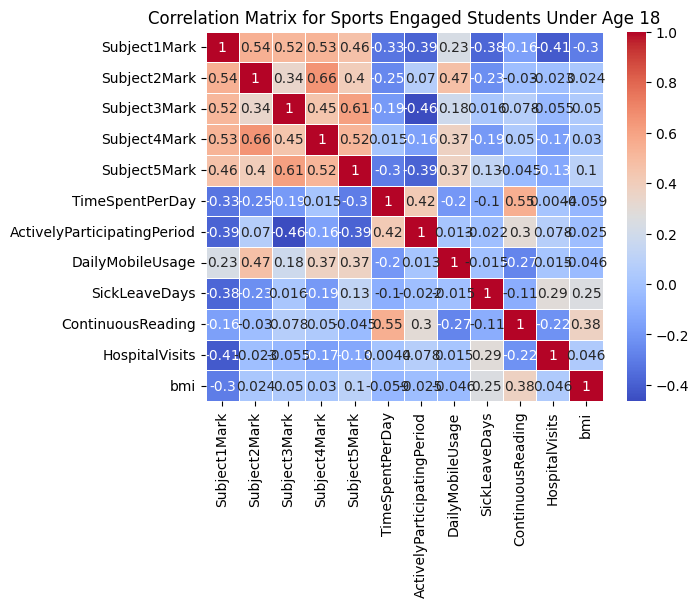

In [ ]:
sns.heatmap(corr_matrix_under_18_interested, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sports Engaged Students Under Age 18')


In [ ]:
b18_not_interested_in_sports_corr = ['Subject1Mark','Subject2Mark','Subject3Mark','Subject4Mark','Subject5Mark','SickLeaveDays','ContinuousReading','HospitalVisits','bmi']

In [ ]:
# Calculate the correlation matrix for students under 18 - Sports not interested students
corr_matrix_under_18_uninterested = b18_not_interested_in_sports[b18_not_interested_in_sports_corr].corr(method='spearman')


In [ ]:
# Display the correlation matrices
print("\nCorrelation Matrix for Sports Not Engaged Students Under Age 18:")
print(corr_matrix_under_18_uninterested)



Correlation Matrix for Sports Not Engaged Students Under Age 18:
                   Subject1Mark  Subject2Mark  Subject3Mark  Subject4Mark  \
Subject1Mark           1.000000      0.828571      1.000000      0.714286   
Subject2Mark           0.828571      1.000000      0.828571      0.885714   
Subject3Mark           1.000000      0.828571      1.000000      0.714286   
Subject4Mark           0.714286      0.885714      0.714286      1.000000   
Subject5Mark           0.942857      0.771429      0.942857      0.771429   
SickLeaveDays         -0.097590     -0.292770     -0.097590     -0.292770   
ContinuousReading      0.925820      0.802377      0.925820      0.678935   
HospitalVisits         0.185164     -0.246885      0.185164     -0.123443   
bmi                   -0.257143      0.085714     -0.257143      0.085714   

                   Subject5Mark  SickLeaveDays  ContinuousReading  \
Subject1Mark           0.942857      -0.097590           0.925820   
Subject2Mark           0.

Text(0.5, 1.0, 'Correlation Matrix for Sports Not Engaged Students Under Age 18')

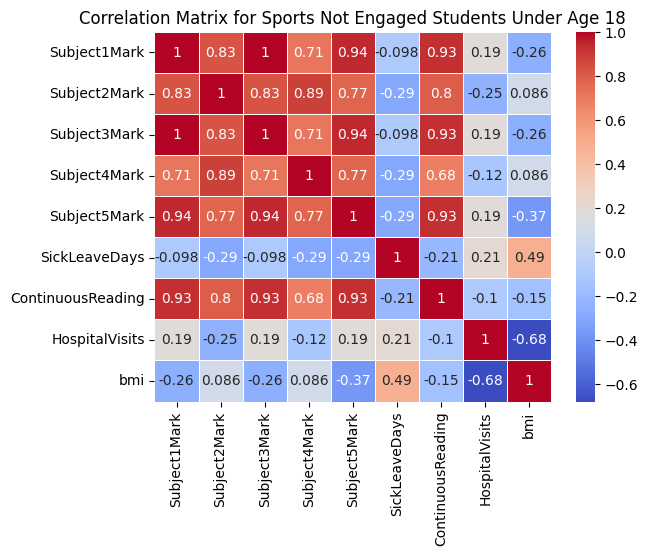

In [ ]:
sns.heatmap(corr_matrix_under_18_uninterested, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sports Not Engaged Students Under Age 18')


##Above 18

###Dataset Preparation

In [ ]:
academic_columns_above_18 = ['MathsMark10', 'TotalMarks10', 'MathsMark12', 'TotalMarks12', 'UGcgpa']
other_columns = ['TimeSpentPerDay', 'ActivelyParticipatingPeriod', 'DailyMobileUsage', 'SickLeaveDays', 'ContinuousReading']
categorical_columns = ['Gender', 'WearingSpecs', 'FeelingSleepy']
sports_engagement_column = 'EngagedInSports'
bmi_column = 'bmi'

In [ ]:
df_above_18 = df[df['Age'] == 'Above 18'][academic_columns_above_18 + other_columns + categorical_columns + ['HospitalVisits','EngagedInSports','bmi','Pains']]

In [ ]:
df_above_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 32 to 224
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MathsMark10                  193 non-null    float64
 1   TotalMarks10                 193 non-null    float64
 2   MathsMark12                  193 non-null    float64
 3   TotalMarks12                 193 non-null    float64
 4   UGcgpa                       193 non-null    float64
 5   TimeSpentPerDay              75 non-null     object 
 6   ActivelyParticipatingPeriod  75 non-null     object 
 7   DailyMobileUsage             193 non-null    object 
 8   SickLeaveDays                193 non-null    object 
 9   ContinuousReading            193 non-null    object 
 10  Gender                       193 non-null    object 
 11  WearingSpecs                 193 non-null    object 
 12  FeelingSleepy                193 non-null    object 
 13  HospitalVisits     

In [ ]:
df_above_18.groupby('EngagedInSports').describe()

MathsMark10                                                 \
                      count       mean        std   min    25%   50%   75%   
EngagedInSports                                                              
No                    118.0  84.177966  13.748430  34.0  76.25  89.0  95.0   
Yes                    75.0  79.186667  14.635844  40.0  70.00  81.0  91.0   

                       TotalMarks10              ... HospitalVisits       \
                   max        count        mean  ...            75%  max   
EngagedInSports                                  ...                       
No                99.0        118.0  434.381356  ...            2.0  9.0   
Yes              100.0         75.0  411.173333  ...            1.0  9.0   

                   bmi                                                        \
                 count       mean       std        min        25%        50%   
EngagedInSports                                                                
No               118.0  22.430591  7.248186  13.296399  19.146219  21.321223   
Yes               75.0  21.788684  3.780350  14.792899  19.019434  21.718066   

                                       
                       75%        max  
EngagedInSports                        
No               24.235345  88.888889  
Yes              24.119370  32.871972  

[2 rows x 56 columns]

In [ ]:
ordinal_mapping = {
    '0 mins': 1, '30 mins': 2, '1 hour': 3, '1 hour 30 mins': 4, '2 hours': 5, '2 hours 30 mins': 6, '3 hours': 7, 'More than 3 hours': 8,
    'Less than 6 months': 1, '6 months to 1 year': 2, '1 to 2 years': 3, '2 to 5 years': 4, 'More than 5 years': 5,
    'Less than 2 hours': 1, '2 to 5 hours': 2, 'More than 5 hours': 3,
    'None': 1, '1 to 5 days': 2, 'More than 5 days': 3,
    'Less than 15 minutes': 1, '15 to 30 minutes': 2, '30 minutes to 1 hour': 3, '1 to 2 hours': 4, '2 to 3 hours': 5, 'More than 3 hours': 6
}

In [ ]:
# Process ordinal columns
for col in other_columns:
    df_above_18[col] = df_above_18[col].map(ordinal_mapping)


###Split - Sports engagement

In [ ]:
# Separate the dataframe into two groups based on sports engagement
a18_interested_in_sports = df_above_18[df_above_18[sports_engagement_column] == 'Yes']
a18_not_interested_in_sports = df_above_18[df_above_18[sports_engagement_column] == 'No']

In [ ]:
a18_interested_in_sports.shape

(75, 17)

In [ ]:
a18_not_interested_in_sports.shape

(118, 17)

###T Tests

In [ ]:
# Perform t-tests for academic performance
for col in academic_columns_above_18:
    t_statistic, p_value = ttest_ind(a18_interested_in_sports[col], a18_not_interested_in_sports[col])
    print(f"\nT-test results for {col}:")
    print(f"t-statistic: {t_statistic}, p-value: {p_value}")


T-test results for MathsMark10:
t-statistic: -2.3972987185994117, p-value: 0.017480189376974695

T-test results for TotalMarks10:
t-statistic: -3.0709279532418106, p-value: 0.0024451327473431336

T-test results for MathsMark12:
t-statistic: -2.687782807149494, p-value: 0.007827919487157995

T-test results for TotalMarks12:
t-statistic: -3.974466732640334, p-value: 9.994833114884061e-05

T-test results for UGcgpa:
t-statistic: -1.5147675883160432, p-value: 0.13148437349522976


In [ ]:
# Perform t-test for BMI
t_statistic_bmi, p_value_bmi = ttest_ind(a18_interested_in_sports[bmi_column].dropna(), a18_not_interested_in_sports[bmi_column].dropna())
print("\nT-test results for BMI:")
print(f"t-statistic: {t_statistic_bmi}, p-value: {p_value_bmi}")


T-test results for BMI:
t-statistic: -0.7077610352302902, p-value: 0.4799564114102228


In [ ]:
# Perform t-tests for other continuous variables
for col in other_columns:
    t_statistic, p_value = ttest_ind(a18_interested_in_sports[col].dropna(), a18_not_interested_in_sports[col].dropna())
    print(f"\nT-test results for {col}:")
    print(f"t-statistic: {t_statistic}, p-value: {p_value}")


T-test results for TimeSpentPerDay:
t-statistic: nan, p-value: nan

T-test results for ActivelyParticipatingPeriod:
t-statistic: nan, p-value: nan

T-test results for DailyMobileUsage:
t-statistic: -3.0936344569701695, p-value: 0.0022738462915273807

T-test results for SickLeaveDays:
t-statistic: -0.4302762434389826, p-value: 0.6674849312411687

T-test results for ContinuousReading:
t-statistic: 0.20526244300825303, p-value: 0.8375856779483984


###Chi Square

In [ ]:
# Perform chi-squared tests for categorical variables
for col in categorical_columns:
    contingency_table = pd.crosstab(df_above_18[col], df_above_18[sports_engagement_column])
    chi2_stat, p_value_cat_sports, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-squared test results for {col} vs. Sports Engagement:")
    print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value_cat_sports}")



Chi-squared test results for Gender vs. Sports Engagement:
Chi-squared statistic: 1.8915713995550207, p-value: 0.16902478980387597

Chi-squared test results for WearingSpecs vs. Sports Engagement:
Chi-squared statistic: 0.29697230882603065, p-value: 0.585786766586653

Chi-squared test results for FeelingSleepy vs. Sports Engagement:
Chi-squared statistic: 0.18479733622936145, p-value: 0.6672824931742665


###Spearman Correlation

In [ ]:
# Calculate the correlation matrix for students under 18 - Sports interested students
corr_matrix_above_18_interested = a18_interested_in_sports.corr(method='spearman')


<ipython-input-77-4755245f6662>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_above_18_interested = a18_interested_in_sports.corr(method='spearman')


In [ ]:
# Display the correlation matrices
print("\nCorrelation Matrix for Sports Engaged Students Above Age 18:")
print(corr_matrix_above_18_interested)



Correlation Matrix for Sports Engaged Students Above Age 18:
                             MathsMark10  TotalMarks10  MathsMark12  \
MathsMark10                     1.000000      0.879733     0.501649   
TotalMarks10                    0.879733      1.000000     0.469297   
MathsMark12                     0.501649      0.469297     1.000000   
TotalMarks12                    0.423353      0.411171     0.741818   
UGcgpa                          0.476798      0.535347     0.410902   
TimeSpentPerDay                -0.212773     -0.188625    -0.408027   
ActivelyParticipatingPeriod    -0.064972     -0.024106    -0.302714   
DailyMobileUsage                0.148052      0.200820     0.120339   
SickLeaveDays                  -0.130335     -0.135844    -0.073522   
ContinuousReading              -0.081825     -0.109689    -0.034925   
HospitalVisits                  0.129747      0.069483     0.186181   
bmi                            -0.151621     -0.096779    -0.118199   

              

Text(0.5, 1.0, 'Correlation Matrix for Sports Engaged Students Above Age 18')

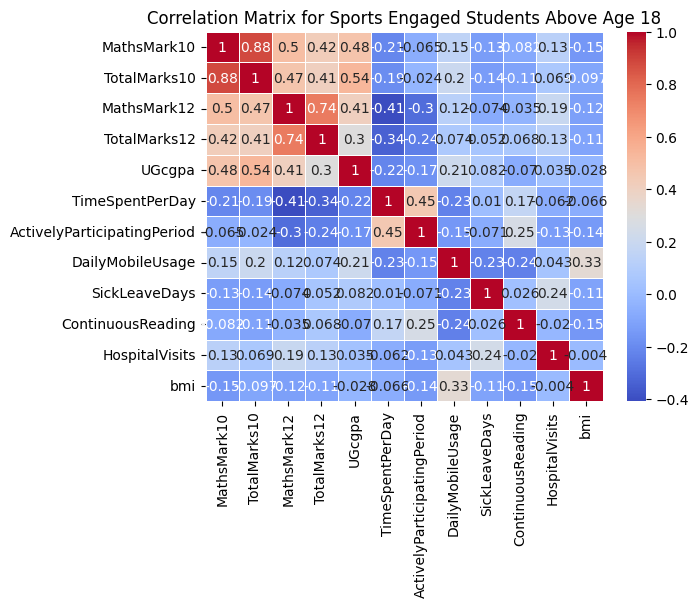

In [ ]:
sns.heatmap(corr_matrix_above_18_interested, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sports Engaged Students Above Age 18')


In [ ]:
a18_not_interested_in_sports_corr = ['MathsMark10', 'TotalMarks10', 'MathsMark12', 'TotalMarks12', 'UGcgpa','SickLeaveDays','ContinuousReading','HospitalVisits','bmi']


In [ ]:
# Calculate the correlation matrix for students under 18 - Sports not interested students
corr_matrix_above_18_uninterested = a18_not_interested_in_sports[a18_not_interested_in_sports_corr].corr(method='spearman')


In [ ]:
# Display the correlation matrices
print("\nCorrelation Matrix for Sports Not Engaged Students Above Age 18:")
print(corr_matrix_above_18_uninterested)



Correlation Matrix for Sports Not Engaged Students Above Age 18:
                   MathsMark10  TotalMarks10  MathsMark12  TotalMarks12  \
MathsMark10           1.000000      0.865716     0.598545      0.611121   
TotalMarks10          0.865716      1.000000     0.613925      0.672762   
MathsMark12           0.598545      0.613925     1.000000      0.778065   
TotalMarks12          0.611121      0.672762     0.778065      1.000000   
UGcgpa                0.512946      0.491213     0.470701      0.390954   
SickLeaveDays        -0.013788     -0.118138    -0.130725     -0.072312   
ContinuousReading     0.175713      0.136756     0.078957      0.064639   
HospitalVisits        0.144417      0.110191     0.106698      0.169851   
bmi                  -0.382019     -0.387449    -0.230872     -0.239948   

                     UGcgpa  SickLeaveDays  ContinuousReading  HospitalVisits  \
MathsMark10        0.512946      -0.013788           0.175713        0.144417   
TotalMarks10       0.

Text(0.5, 1.0, 'Correlation Matrix for Sports Not Engaged Students Above Age 18')

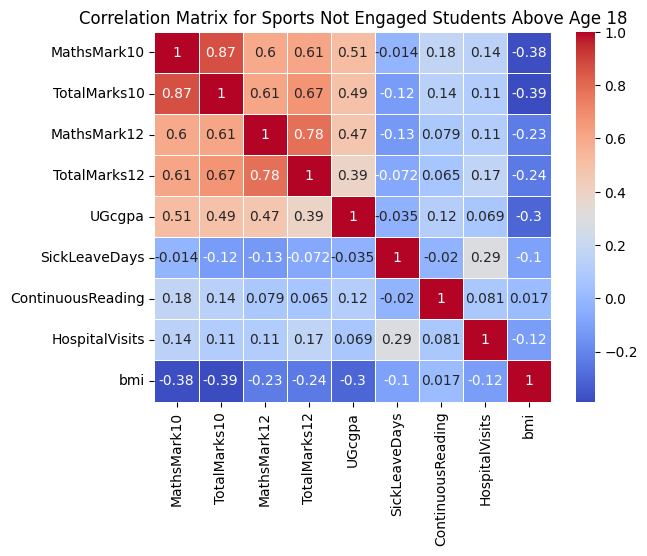

In [ ]:
sns.heatmap(corr_matrix_above_18_uninterested, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sports Not Engaged Students Above Age 18')

#Graph

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Filter data for students below 18
df_below_18 = df[df['Age'] != 'Above 18']

# Filter data for students above 18
df_above_18 = df[df['Age'] == 'Above 18']

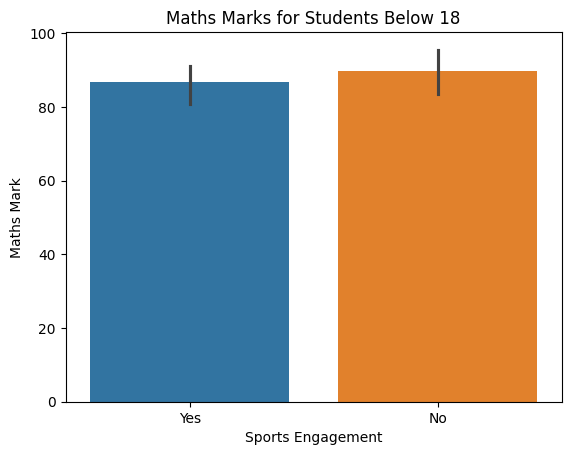

In [ ]:
# Grouped bar chart for students below 18
sns.barplot(x='EngagedInSportsB18', y='Subject3Mark', data=df_below_18, hue='EngagedInSportsB18')
plt.title('Maths Marks for Students Below 18')
plt.xlabel('Sports Engagement')
plt.ylabel('Maths Mark')
plt.show()

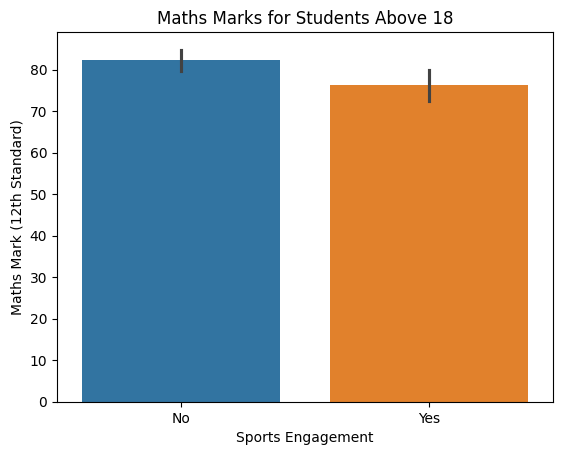

In [ ]:
# Grouped bar chart for students above 18
sns.barplot(x='EngagedInSports', y='MathsMark12', data=df_above_18, hue='EngagedInSports')
plt.title('Maths Marks for Students Above 18')
plt.xlabel('Sports Engagement')
plt.ylabel('Maths Mark (12th Standard)')
plt.show()

#Clustering


In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           225 non-null    object 
 1   Gender                         225 non-null    object 
 2   Study                          225 non-null    object 
 3   Age                            225 non-null    object 
 4   Subject1Name                   32 non-null     object 
 5   Subject1Mark                   32 non-null     float64
 6   Subject2Name                   32 non-null     object 
 7   Subject2Mark                   32 non-null     float64
 8   Subject3Name                   32 non-null     object 
 9   Subject3Mark                   32 non-null     float64
 10  Subject4Name                   32 non-null     object 
 11  Subject4Mark                   32 non-null     float64
 12  Subject5Name                   32 non-null     obj

##Below 18

In [ ]:
df_below_18 = pd.merge(df_below_18, df[['SportsPlyerOf']], left_index=True, right_index=True)


In [ ]:
df_below_18 = pd.merge(df_below_18, df[['PhysicalActivityOrSportsDoing']], left_index=True, right_index=True)


In [ ]:
df_below_18 = pd.merge(df_below_18, df[['PreferredTimeToPlay']], left_index=True, right_index=True)


In [ ]:
df_below_18 = pd.merge(df_below_18, df[['ReasonForPlaying']], left_index=True, right_index=True)


In [ ]:
df_below_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             32 non-null     object 
 1   Gender                           32 non-null     object 
 2   Study                            32 non-null     object 
 3   Age                              32 non-null     object 
 4   Subject1Name                     32 non-null     object 
 5   Subject1Mark                     32 non-null     float64
 6   Subject2Name                     32 non-null     object 
 7   Subject2Mark                     32 non-null     float64
 8   Subject3Name                     32 non-null     object 
 9   Subject3Mark                     32 non-null     float64
 10  Subject4Name                     32 non-null     object 
 11  Subject4Mark                     32 non-null     float64
 12  Subject5Name            

In [ ]:
df_below_18.head()

,Name,Gender,Study,Age,Subject1Name,Subject1Mark,Subject2Name,Subject2Mark,Subject3Name,Subject3Mark,...,Pains,ContinuousReading,EngagedInSportsB18,heights,weights,bmi,SportsPlyerOf_y,PhysicalActivityOrSportsDoing_y,PreferredTimeToPlay_y,ReasonForPlaying_y
0,Visvambra.s,Male,Matric,13-18,Tamil,96.0,English,90.0,Maths,94.0,...,None of the above,15 to 30 minutes,Yes,80,28,43.750000,School/College level,Cricket,Evening,For Entertainment
1,Selvabrindha K,Female,Engineering College,13-18,Tamil,97.0,English,90.0,Maths,95.0,...,None of the above,30 minutes to 1 hour,No,150,46,20.444444,NaN,NaN,NaN,NaN
2,Nidhekshaa N K,Female,Engineering College,13-18,Computer organisation,75.0,Data science,90.0,Maths,90.0,...,"Leg pain, Headaches",15 to 30 minutes,Yes,152,43,18.611496,"State level, National level","Yoga, Karate, Badminton, Cycling",Evening,For Health and Fitness
3,KANMANIPRIYA S,Female,Engineering College,13-18,Tamil,96.0,Discrete mathematical structures,100.0,Maths,94.0,...,Neck pain,30 minutes to 1 hour,No,155,50,20.811655,NaN,NaN,NaN,NaN
4,R Ranish,Male,Matric,6-12,Science,74.0,English,74.0,Maths,93.0,...,Leg pain,More than 3 hours,Yes,11,17,1404.958678,School/College level,Football,Both Morning and Evening,To become a champion


In [ ]:
df_below_18['Gender'] = df_below_18['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df_below_18['WearingSpecs'] = df_below_18['WearingSpecs'].map({'Yes': 1, 'No': 0})

In [ ]:
df_below_18['FeelingSleepy'] = df_below_18['FeelingSleepy'].map({'Yes': 1, 'No': 0})

In [ ]:
df_below_18['EngagedInSportsB18'] = df_below_18['EngagedInSportsB18'].map({'Yes': 1, 'No': 0})

In [ ]:
ordinal_mapping = {
    'Morning':1, 'Evening':2, 'Both Morning and Evening':3, 'Only on Holidays':4,
    'For Health and Fitness':1,'For Entertainment':2,'To become a champion':3
}


In [ ]:
play_cl=['PreferredTimeToPlay','ReasonForPlaying']

In [ ]:
# Process ordinal columns
for col in play_cl:
    df_below_18[col] = df_below_18[col].map(ordinal_mapping)


KeyError: 'PreferredTimeToPlay'

In [ ]:
columns_to_fill = ['Pains','SportsPlyerOf','PhysicalActivityOrSportsDoing']
df_below_18[columns_to_fill] = df_below_18[columns_to_fill].fillna('Not Engaged')

In [ ]:
df_below_18.info()

In [ ]:
df_below_18['Pains'] = df_below_18['Pains'].str.join(' ')
df_below_18['SportsPlyerOf'] = df_below_18['SportsPlyerOf'].str.join(' ')
df_below_18['PhysicalActivityOrSportsDoing'] = df_below_18['PhysicalActivityOrSportsDoing'].str.join(' ')

In [ ]:
columns_to_fill = ['TimeSpentPerDay', 'ActivelyParticipatingPeriod','PreferredTimeToPlay','ReasonForPlaying']
df_below_18[columns_to_fill] = df_below_18[columns_to_fill].fillna(0)

In [ ]:
df_below_18.info()

###Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in ['Pains', 'SportsPlyerOf', 'PhysicalActivityOrSportsDoing']:
    df_below_18[col + '_encoded'] = label_encoder.fit_transform(df_below_18[col])

In [ ]:
df_below_18 = df_below_18.drop(columns=['Pains', 'SportsPlyerOf', 'PhysicalActivityOrSportsDoing'])


In [ ]:
df_below_18.info()

In [ ]:
df_below_18.head()

###Cluster

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_below_18)

In [ ]:
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [ ]:
cluster_labels = kmeans.fit_predict(normalized_data)

In [ ]:
# Visualize clustering results using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

In [ ]:
# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.8)
plt.title('Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Interpret clusters
cluster_centers = kmeans.cluster_centers_
cluster_means = scaler.inverse_transform(cluster_centers)  # Transform back to original scale

In [ ]:
# Create a DataFrame with cluster means
cluster_means_df = pd.DataFrame(cluster_means, columns=df_below_18.columns)

In [ ]:
# Display cluster means
print("Cluster Centers (Means):")
print(cluster_means_df)

In [ ]:
df_below_18['Cluster'] = cluster_labels

In [ ]:
df_below_18['Cluster']

In [ ]:
cluster_dfs = []
for cluster_id in range(n_clusters):
    cluster_df = df_below_18[df_below_18['Cluster'] == cluster_id].copy()
    cluster_dfs.append(cluster_df)



In [ ]:
# Display each cluster's DataFrame side by side
for i, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {i}:\n")
    display(cluster_df)
    print("\n\n")

###Train-Test Split

In [ ]:
df_below_18.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(df_below_18, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of the resulting datasets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

In [ ]:
y_train_df= train_data.iloc[:,-1].copy()

In [ ]:
y_train_df.info()

In [ ]:
x_train_df =train_data.iloc[:, :-1].copy()

In [ ]:
x_train_df.info()

In [ ]:
y_test_df= test_data.iloc[:,-1].copy()

In [ ]:
y_test_df.info()

In [ ]:
x_test_df =test_data.iloc[:, :-1].copy()

In [ ]:
x_test_df.info()

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn1.fit(x_train_df, y_train_df)

In [ ]:
y_train_pred = knn1.predict(x_train_df)

In [ ]:
#Calculate training accuracy
training_accuracy = accuracy_score(y_train_df, y_train_pred)
print("Training Accuracy of KNN model:", training_accuracy)

In [ ]:
y_pred = knn1.predict(x_test_df)

In [ ]:
testing_accuracy = accuracy_score(y_test_df, y_pred)
print("Testing Accuracy of KNN model:", testing_accuracy)
precision = precision_score(y_test_df, y_pred,average='macro')
recall = recall_score(y_test_df, y_pred,average='macro')
f1 = f1_score(y_test_df, y_pred,average='macro')
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 : ",f1)

###SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_df, y_train_df)

In [ ]:
svm_pred_train = svm_model.predict(x_train_df)

In [ ]:
svm_accuracy_train = accuracy_score(y_train_df, svm_pred_train)

In [ ]:
print("Training accuracy of SVM:", svm_accuracy_train)

In [ ]:
svm_pred_test = svm_model.predict(x_test_df)

In [ ]:
svm_accuracy_test = accuracy_score(y_test_df, svm_pred_test)

In [ ]:
print("Test accuracy of SVM:", svm_accuracy_test)

In [ ]:
svm_precision = precision_score(y_test_df, svm_pred_test,average='macro')
svm_recall = recall_score(y_test_df, svm_pred_test,average='macro')
svm_f1 = f1_score(y_test_df, svm_pred_test,average='macro')
print("Precision : ",svm_precision)
print("Recall : ",svm_recall)
print("F1 : ",svm_f1)

###RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train_df, y_train_df)

In [ ]:
rf_pred_train = rf_model.predict(x_train_df)

In [ ]:
rf_accuracy_train = accuracy_score(y_train_df, rf_pred_train)

In [ ]:
print("Training accuracy of Random Forest:", rf_accuracy_train)

In [ ]:
rf_pred_test = rf_model.predict(x_test_df)

In [ ]:
rf_accuracy_test = accuracy_score(y_test_df, rf_pred_test)

In [ ]:
print("Test accuracy of Random Forest:", rf_accuracy_test)

In [ ]:
rf_precision = precision_score(y_test_df, rf_pred_test,average='macro')
rf_recall = recall_score(y_test_df, rf_pred_test,average='macro')
rf_f1 = f1_score(y_test_df, rf_pred_test,average='macro')
print("Precision : ",rf_precision)
print("Recall : ",rf_recall)
print("F1 : ",rf_f1)

##Above 18

In [ ]:
df_above_18.info()

In [ ]:
df_above_18 = pd.merge(df_above_18, df[['SportsPlyerOf']], left_index=True, right_index=True)


In [ ]:
df_above_18 = pd.merge(df_above_18, df[['PhysicalActivityOrSportsDoing']], left_index=True, right_index=True)


In [ ]:
df_above_18 = pd.merge(df_above_18, df[['PreferredTimeToPlay']], left_index=True, right_index=True)


In [ ]:
df_above_18 = pd.merge(df_above_18, df[['ReasonForPlaying']], left_index=True, right_index=True)


In [ ]:
df_above_18.info()

In [ ]:
df_above_18.head()

In [ ]:
df_above_18['Gender'] = df_above_18['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df_above_18['WearingSpecs'] = df_above_18['WearingSpecs'].map({'Yes': 1, 'No': 0})

In [ ]:
df_above_18['FeelingSleepy'] = df_above_18['FeelingSleepy'].map({'Yes': 1, 'No': 0})

In [ ]:
df_above_18['EngagedInSports'] = df_above_18['EngagedInSports'].map({'Yes': 1, 'No': 0})

In [ ]:
ordinal_mapping = {
    'Morning':1, 'Evening':2, 'Both Morning and Evening':3, 'Only on Holidays':4,
    'For Health and Fitness':1,'For Entertainment':2,'To become a champion':3
}


In [ ]:
play_cl=['PreferredTimeToPlay','ReasonForPlaying']

In [ ]:
# Process ordinal columns
for col in play_cl:
    df_above_18[col] = df_above_18[col].map(ordinal_mapping)


In [ ]:
columns_to_fill = ['Pains','SportsPlyerOf','PhysicalActivityOrSportsDoing']
df_above_18[columns_to_fill] = df_above_18[columns_to_fill].fillna('Not Engaged')

In [ ]:
df_above_18.info()

In [ ]:
df_above_18['Pains'] = df_above_18['Pains'].str.join(' ')
df_above_18['SportsPlyerOf'] = df_above_18['SportsPlyerOf'].str.join(' ')
df_above_18['PhysicalActivityOrSportsDoing'] = df_above_18['PhysicalActivityOrSportsDoing'].str.join(' ')

In [ ]:
columns_to_fill = ['TimeSpentPerDay', 'ActivelyParticipatingPeriod','PreferredTimeToPlay','ReasonForPlaying','SickLeaveDays']
df_above_18[columns_to_fill] = df_above_18[columns_to_fill].fillna(0)

In [ ]:
df_above_18.info()

###Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in ['Pains', 'SportsPlyerOf', 'PhysicalActivityOrSportsDoing']:
    df_above_18[col + '_encoded'] = label_encoder.fit_transform(df_above_18[col])

In [ ]:
df_above_18 = df_above_18.drop(columns=['Pains', 'SportsPlyerOf', 'PhysicalActivityOrSportsDoing'])


In [ ]:
df_above_18.info()

In [ ]:
df_above_18.head()

###Cluster

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_above_18)

In [ ]:
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [ ]:
cluster_labels = kmeans.fit_predict(normalized_data)

In [ ]:
# Visualize clustering results using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

In [ ]:
# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.8)
plt.title('Clustering Results (PCA) - Above Age 18')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Interpret clusters
cluster_centers = kmeans.cluster_centers_
cluster_means = scaler.inverse_transform(cluster_centers)  # Transform back to original scale

In [ ]:
# Create a DataFrame with cluster means
cluster_means_df = pd.DataFrame(cluster_means, columns=df_above_18.columns)

In [ ]:
# Display cluster means
print("Cluster Centers (Means):")
print(cluster_means_df)

In [ ]:
df_above_18['Cluster'] = cluster_labels

In [ ]:
df_above_18['Cluster']

In [ ]:
cluster_dfs = []
for cluster_id in range(n_clusters):
    cluster_df = df_above_18[df_above_18['Cluster'] == cluster_id].copy()
    cluster_dfs.append(cluster_df)



In [ ]:
# Display each cluster's DataFrame side by side
for i, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {i}:\n")
    display(cluster_df)
    print("\n\n")

###Train-Test Split

In [ ]:
df_above_18.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(df_above_18, test_size=0.6, random_state=42)


In [ ]:
# Print the shapes of the resulting datasets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

In [ ]:
y_train_df= train_data.iloc[:,-1].copy()
y_train_df.info()

In [ ]:
x_train_df =train_data.iloc[:, :-1].copy()
x_train_df.info()

In [ ]:
y_test_df= test_data.iloc[:,-1].copy()
y_test_df.info()

In [ ]:
x_test_df =test_data.iloc[:, :-1].copy()
x_test_df.info()

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn2.fit(x_train_df, y_train_df)

In [ ]:
y_train_pred = knn2.predict(x_train_df)

In [ ]:
#Calculate training accuracy
training_accuracy = accuracy_score(y_train_df, y_train_pred)
print("Training Accuracy of KNN model:", training_accuracy)

In [ ]:
y_pred = knn2.predict(x_test_df)

In [ ]:
testing_accuracy = accuracy_score(y_test_df, y_pred)
print("Testing Accuracy of KNN model:", testing_accuracy)

In [ ]:
precision = precision_score(y_test_df, y_pred,average='macro')
recall = recall_score(y_test_df, y_pred,average='macro')
f1 = f1_score(y_test_df, y_pred,average='macro')
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 : ",f1)

###SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_df, y_train_df)

In [ ]:
svm_pred_train = svm_model.predict(x_train_df)

In [ ]:
svm_accuracy_train = accuracy_score(y_train_df, svm_pred_train)

In [ ]:
print("Training accuracy of SVM:", svm_accuracy_train)

In [ ]:
svm_pred_test = svm_model.predict(x_test_df)

In [ ]:
svm_accuracy_test = accuracy_score(y_test_df, svm_pred_test)

In [ ]:
print("Test accuracy of SVM:", svm_accuracy_test)

In [ ]:
svm_precision = precision_score(y_test_df, svm_pred_test,average='macro')
svm_recall = recall_score(y_test_df, svm_pred_test,average='macro')
svm_f1 = f1_score(y_test_df, svm_pred_test,average='macro')
print("Precision : ",svm_precision)
print("Recall : ",svm_recall)
print("F1 : ",svm_f1)

###RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train_df, y_train_df)

In [ ]:
rf_pred_train = rf_model.predict(x_train_df)

In [ ]:
rf_accuracy_train = accuracy_score(y_train_df, rf_pred_train)

In [ ]:
print("Training accuracy of Random Forest:", rf_accuracy_train)

In [ ]:
rf_pred_test = rf_model.predict(x_test_df)

In [ ]:
rf_accuracy_test = accuracy_score(y_test_df, rf_pred_test)

In [ ]:
print("Test accuracy of Random Forest:", rf_accuracy_test)

In [ ]:
rf_precision = precision_score(y_test_df, rf_pred_test,average='macro')
rf_recall = recall_score(y_test_df, rf_pred_test,average='macro')
rf_f1 = f1_score(y_test_df, rf_pred_test,average='macro')
print("Precision : ",rf_precision)
print("Recall : ",rf_recall)
print("F1 : ",rf_f1)